# 1 - Introdução 

- José Luiz Maciel Pimenta  NUSP: 11896720 
- Diego Pavan Soler NUSP: 4607661
- Luis Manrique NUSP: 5779294

## 1.1 - Compartilhamento do Projeto

- Git: https://github.com/JoseLuiz432/MAC5768.git
- Drive: https://drive.google.com/drive/folders/1bvwXFjPWP-Sdb5Lwh6zFd_vQs24mJ6_c?usp=sharing

## 1.2 - Tabela Global Sumária

- Número de classes | 10

- Número de imagens | 1620

- Tamanho da base (bytes) | 3283354

> - Raw | 3119924 -> Fotos sem qualquer pré-processamento
> - dataset | 163093 -> Fotos com padronização da resolução

- Resolução das imagens | 720 linhas por 1280 colunas

- Classes escolhidas e número de objetos por classe

> - Caneta  | 10
> - Livro   | 6 
> - Caneca  | 4
> - Perfume | 4
> - Controle| 4
> - Calçado | 4
> - Rolha   | 4
> - Mouse   | 3
> - PenDrive| 3
> - Faca    | 3

## 1.3 - Informações sobre a aquisição dos dados
As imagens do dataset foram capturadas utilizando câmeras de três modelos de celulares diferentes:

*   Xiaomi A1
*   Lenovo A6
*   Moto x4

Estão presentes no dataset imagens de 10 classes, (Caneta, Livro, Controle, Rolha, Caneca, Perfume, Calçado, Faca, Mouse e Pendrive), cada classe contém pelo menos três objetos diferentes. Para cada objeto, foram capturadas imagens com três fundos diferentes, (Preto, Colorido e Branco) em duas localidades (Dentro e Fora) para dois horarios (Dia e Noite), para cada configuração, foram capturadas três imagens. Com isso, espera-se que o dataset tenha um total de 36 fotos por objeto.
 



# 2 - Gerar Ambiente de Trabalho

Este notebook foi desenvolvido no Google Colab. Assim, aproveitamos o fato de poder acessar o Google Drive diretamente. Contudo, para que isso seja possível é necessário ter acesso a pasta "Trabalho_Visão" (Link do Drive em 1.1), criar um atalho, desta pasta, no diretorio raiz do Drive ("/content/gdrive/My_Drive") e, por fim, executar o código abaixo para que o Colab tenha acesso ao seu Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Após uma motagem do Drive ser bem sucedida, é necessário mudar o diretório de trabalho para a pasta "Trabalho_Visão". Isso é feito executando a celula abaixo:

In [ ]:
import os
os.chdir('/content/gdrive/My Drive/Trabalho_Visao')

Para este trabalho utilizamos algumas bibliotecas, como o scikit-image. Para instalar essas bibliotecas é necessário executar a célula abaixo.

In [ ]:
! python -m pip install -U scikit-image

In [ ]:
import numpy as np
import pandas as pd
from skimage import io
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ipywidgets as widgets

# 3 - Apresentação




## 3.1 - Tabela dos Dados
Esta tabela apresenta todas as informações sobre cada uma das fotos tiradas.
- Na coluna DIR é informado o diretório que a imagem se encontra (adicionando ao início  '/content/gdrive/My Drive/Trabalho_Visao/dataset/';
- Na coluna DATE é informado a data em que a foto foi inserida no dataset;
- Na coluna CLASS_NAME é informado a classe na qual o objeto pertence; 
- Na coluna OBJ_ID, é informado o id de cada objeto escolhido;
- Na coluna BACKGROUND é informado o fundo utilizado na foto;
- Na coluna LIGHT é informado se a foto foi tirada de DIA ou NOITE;
- Na coluna INDOOR é informado se a foto foi tirada dentro de casa (TRUE) ou fora de casa (FALSE);


In [ ]:
%load_ext google.colab.data_table

df = pd.read_csv('dataset/dataset.csv')
df

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


DIR        DATE CLASS_NAME  ... BACKGROUND  LIGHT INDOOR
0     Calcado/calcado-001.jpg  24-09-2020    Calcado  ...     Branco    Dia   True
1     Calcado/calcado-002.jpg  24-09-2020    Calcado  ...     Branco    Dia   True
2     Calcado/calcado-003.jpg  24-09-2020    Calcado  ...     Branco    Dia   True
3     Calcado/calcado-004.jpg  24-09-2020    Calcado  ...     Branco    Dia   True
4     Calcado/calcado-005.jpg  24-09-2020    Calcado  ...     Branco    Dia   True
...                       ...         ...        ...  ...        ...    ...    ...
1615      Rolha/Rolha-370.jpg  30/09/2020      Rolha  ...   Colorido  Noite   True
1616      Rolha/Rolha-376.jpg  30/09/2020      Rolha  ...     Branco  Noite   True
1617      Rolha/Rolha-382.jpg  30/09/2020      Rolha  ...     Branco  Noite   True
1618      Rolha/Rolha-388.jpg  30/09/2020      Rolha  ...     Branco  Noite   True
1619      Rolha/Rolha-394.jpg  30/09/2020      Rolha  ...     Branco  Noite   True

[1620 rows x 7 columns]

## 3.2 - Distribuição das Classes


Apesar de que o número de fotos por objeto é o mesmo (36 fotos por objeto), foi escolhido quantidades diferentes de objetos por classe. Esse fato, é ilustrado pelos dois gráficos abaixo.

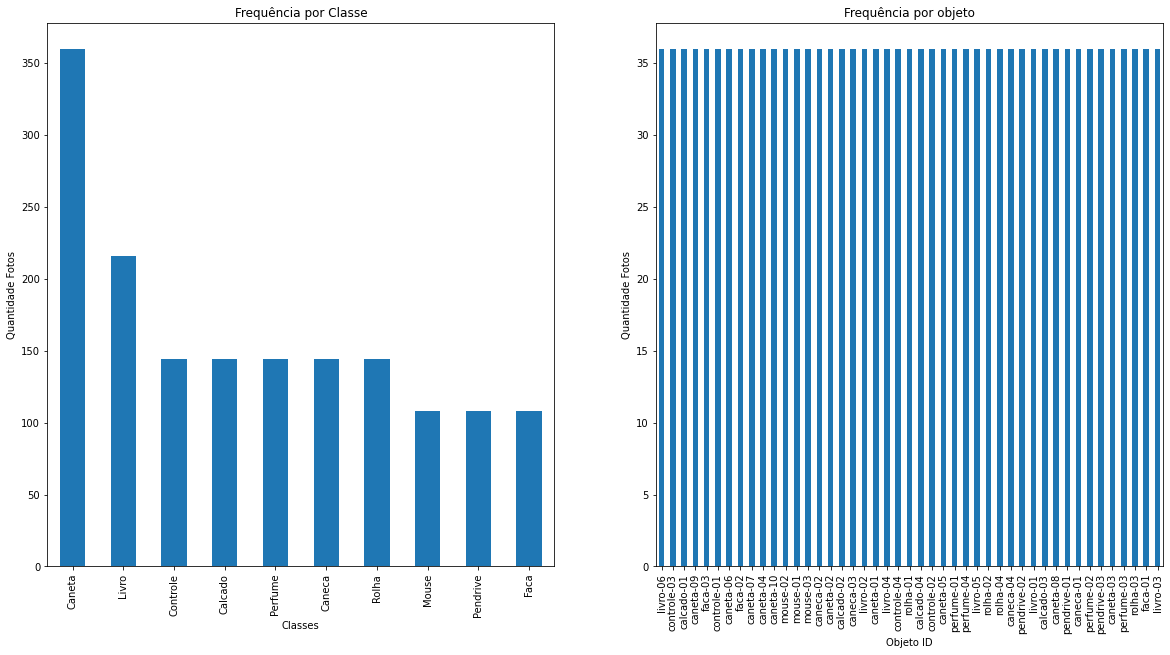

In [ ]:
df = pd.read_csv('dataset/dataset.csv')
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(20, 10))
axs1.set(ylabel='Quantidade Fotos', xlabel='Classes', title='Frequência por Classe')
axs2.set(ylabel='Quantidade Fotos', xlabel='Objeto ID', title='Frequência por objeto')
pl = df['CLASS_NAME'].value_counts().plot(ax=axs1, kind='bar')
pl2 = df['OBJ_ID'].value_counts().plot(ax=axs2, kind='bar')

No gráfico, Frequência por Objeto, o Objeto ID é a identificação de um objeto específico de cada classe. Optamos por colocar em seu prefixo o nome na qual o objeto pertence, ficando assim da forma:
- \<nome_classe-ID>

Como colocado no início do texto, o número de objeto por classe ficou da seguinte forma:

- São 10 canetas totalizando uma quantidade de 360 fotos;
- São 6 livros totalizando uma quantidade de 216 fotos;
- São 4 controles, 4 rolhas de vinho, 4 canecas, 4 perfumes e 4 calçados cada uma com a quantidade total de 144 fotos;
- São 3 facas, 3 mouses de computador e 3 pendrives cada uma com a quantidade total de 108 fotos;

Assim, somando todas as fotos, nossa base de dados tem a quantidade total de 1620 fotos. As fotos foram colocadas no diretorio RAW sem qualquer pré-processamento. Para fins de padronização, a resolução de cada uma das fotos foi modificada e adicionada a pasta dataset, com a resolução HD, ou seja, 1280x720.

## 3.3 - MNIST

 Para a visualização do dataset foi utilizada uma abordagem MNIST-like, que consiste em exibir uma amostra do nosso conjunto de imagens em grid. Cada linha do grid exibe uma determinada categoria. As imagens exibidas são de tamanho reduzido e a ideia é ter uma noção do dataset através de um único plot.

In [ ]:
# Configurando a interface de interação com o usuário
classes = list(df['CLASS_NAME'].unique())
data = {}
for idx, x in enumerate(classes): data[x] = "data_" + str(idx)
style = {'description_width': 'initial'}

names = []
checkbox_objects = []
for key in data:
    checkbox_objects.append(widgets.Checkbox(value=True, description=key))
    names.append(key)

arg_dict = {names[i]: checkbox for i, checkbox in enumerate(checkbox_objects)}
half_size = int(len(checkbox_objects)/2)
ui1 = widgets.HBox(children=checkbox_objects[:half_size])
ui2 = widgets.HBox(children=checkbox_objects[half_size:])

num_obj = widgets.IntSlider(description='Número de imagens por classe:', 
                    layout=widgets.Layout(width='500px', height='auto'),
                    style=style, min=1,max=9,step=1,value=9)

background = widgets.Dropdown(options=['Todos']+list(df['BACKGROUND'].unique()),
                              value='Todos', description='Cor de fundo:',
                              style=style, disabled=False,)

light = widgets.Dropdown(options=['Ambas']+list(df['LIGHT'].unique()),
                              value='Ambas', description='Iluminação:',
                              style=style, disabled=False,)

indoor = widgets.Dropdown(options=['Ambos']+list(df['INDOOR'].unique()),
                              value='Ambos', description='Indoor:',
                              style=style, disabled=False,)
selected_classes = []
def select_class(**kwargs):
    selected_classes.clear()

    for key in kwargs:
        if kwargs[key] is True:
            selected_classes.append(key)

out = widgets.interactive_output(select_class, arg_dict)

def show_menu():
  print("Selecione os objetos:")
  display(ui1, ui2)
  display(num_obj)
  display(background)
  display(light)
  display(indoor)

In [ ]:
def plotgrid(df_filtered):
  columns = int(num_obj.value)
  rows = len(selected_classes)
  fig = plt.figure(figsize=(columns * 1.9, rows * 2.4))
  fig.tight_layout()

  for i, classe in zip(range(1, rows +1), selected_classes):
      row_images = df_filtered[df_filtered['CLASS_NAME']==classe].sample(n=columns)
      for idx, image in enumerate(row_images['DIR']):
        img = mpimg.imread(image)
        fig.add_subplot(rows, columns, (i - 1) * columns + idx + 1)
        plt.tight_layout(pad=0.0,h_pad=0.0,w_pad=0.0)
        plt.axis('off')
        plt.imshow(img, interpolation='nearest', aspect='auto')

In [ ]:
def apply_filter():
  if len(selected_classes) < 1:
    print("Selecione ao menos uma classe de objetos")
  else:
    df_filtered = df[df["CLASS_NAME"].isin(selected_classes)]
    
    if background.value != 'Todos': 
      df_filtered = df_filtered[df_filtered["BACKGROUND"].isin([background.value])]
    if light.value != 'Ambas': 
      df_filtered = df_filtered[df_filtered['LIGHT'].isin([light.value])]
    if indoor.value != 'Ambos': 
      df_filtered = df_filtered[df_filtered["INDOOR"].isin([indoor.value])]
    
    return df_filtered

Para que fosse possível personalizar a visualização MNIST-like, foi criado um painel interativo. Nele é possível filtrar as categorias, escolher cor de fundo, local e iluminação, além da quantidade de imagens apresentada por categoria.

In [ ]:
os.chdir('/content/gdrive/My Drive/Trabalho_Visao/dataset')
show_menu()

Selecione os objetos:


IntSlider(value=9, description='Número de imagens por classe:', layout=Layout(height='auto', width='500px'), m…

Dropdown(description='Cor de fundo:', options=('Todos', 'Branco', 'Colorido', 'Preto'), style=DescriptionStyle…

Dropdown(description='Iluminação:', options=('Ambas', 'Dia', 'Noite'), style=DescriptionStyle(description_widt…

Dropdown(description='Indoor:', options=('Ambos', True, False), style=DescriptionStyle(description_width='init…

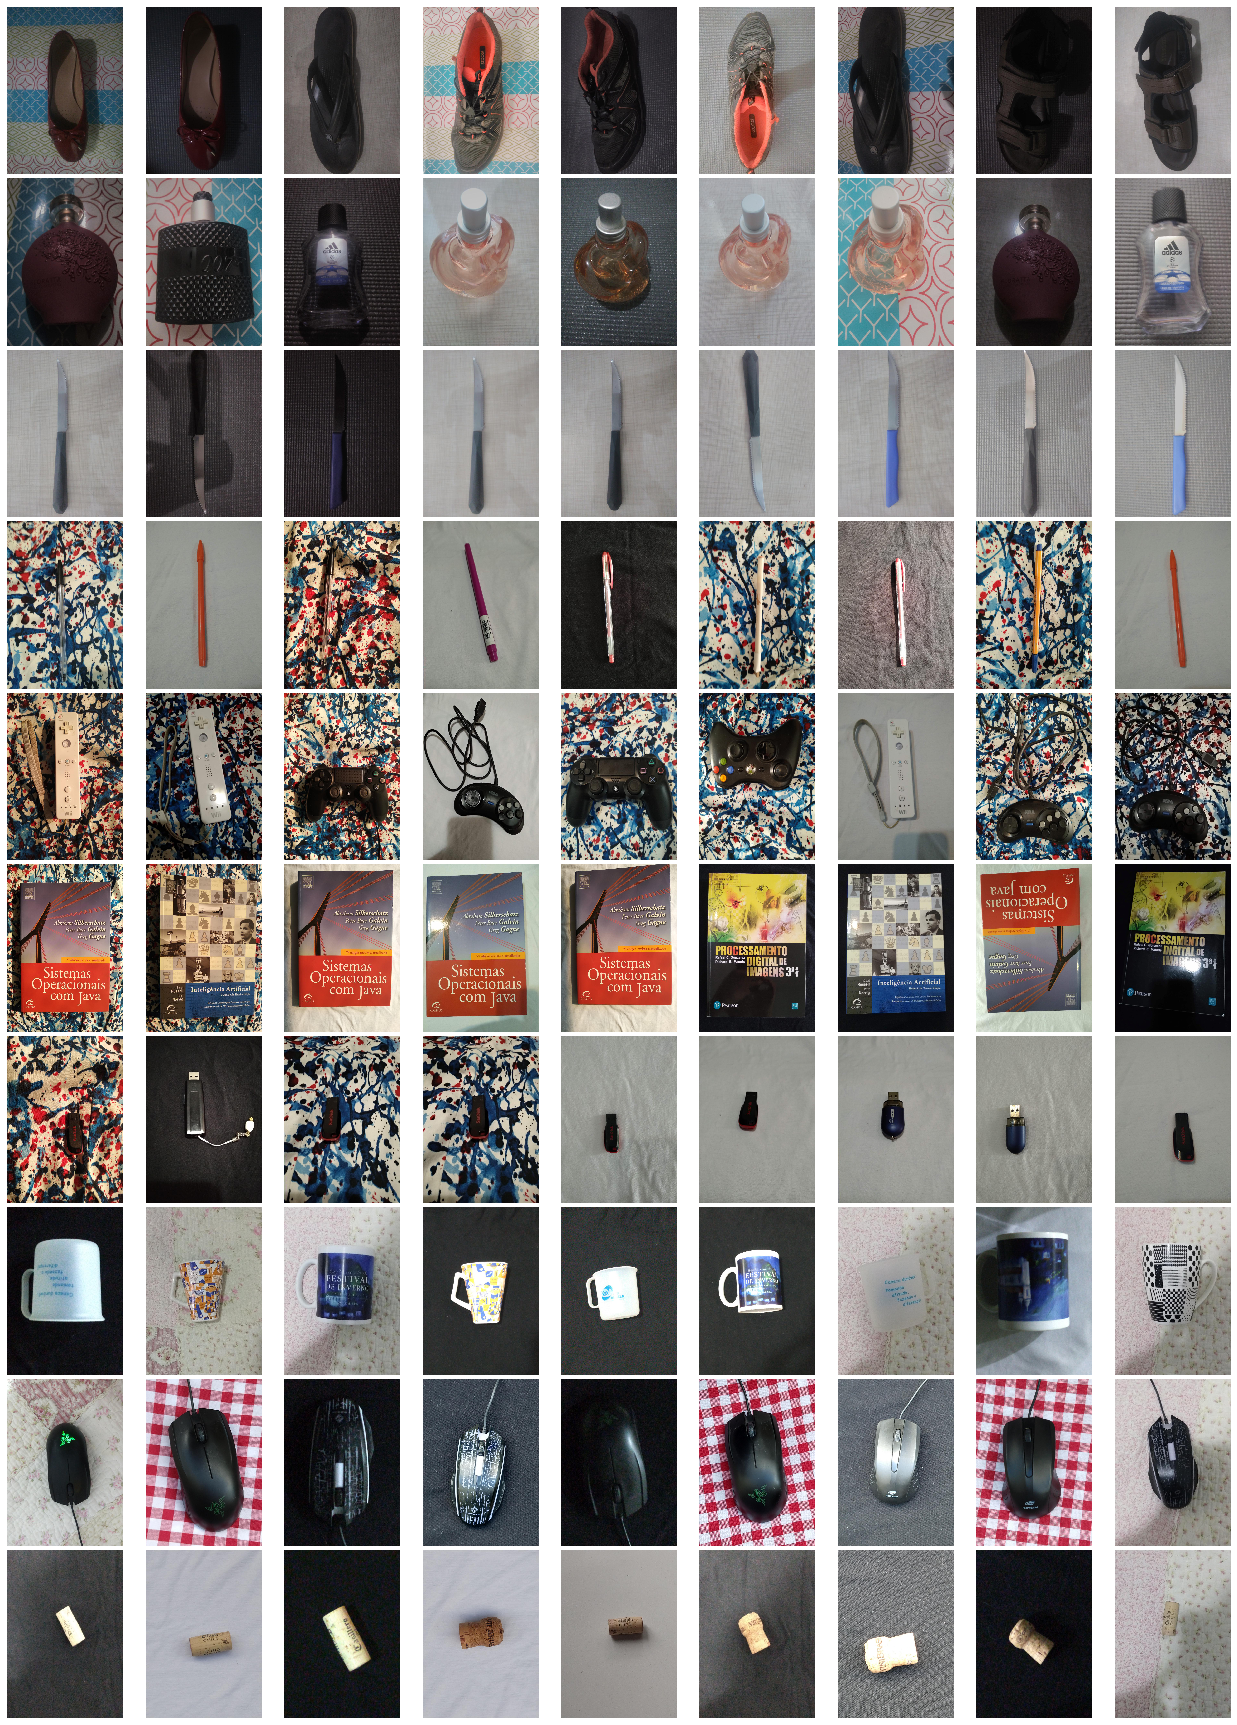

In [ ]:
df_filtered = apply_filter()
plotgrid(df_filtered)

## 3.4 - Adicional 
- Dispersão dos dados em relação a intensidade média, depois de transformar a imagem em escalas de cinza, e a sua simetria horizontal


In [ ]:
def mean_intensity(image):
    return np.mean(image)

def Hsimmetry(image):
    # The processing below invert the order of the columns of the image
    reflected_image = image[:, ::-1]
    return -np.mean(np.abs(image - reflected_image))

def convert2features(image):
    return np.array([mean_intensity(image),
                     Hsimmetry(image)])
    
def load_random_imgs(nums, df_imgs):
  df_aux = df_imgs.sample(n = nums)
  filenames = df_aux['DIR'].to_list()
  list_image = []
  for filename in filenames:
      list_image.append(rgb2gray(io.imread(f'dataset/{filename}')))
    
  z = df_aux['CLASS_NAME'].to_numpy()
  y = np.unique(z, return_inverse=True)[1].tolist()
  x = np.array([convert2features(image) for image in list_image]) 
  original_y = np.unique(z)
  return x, y, original_y

F = ['Mean intensity', 'Hsimmetry']

def plot_features(ax, X, y, names_cls):
  for cl in np.unique(y):
    ax.scatter(X[y==cl,0], \
               X[y==cl,1], \
              label=f'{names_cls[cl]}', alpha = 0.4)

    ax.set_xlabel(F[0])
    ax.set_ylabel(F[1])
    ax.legend(loc='best')

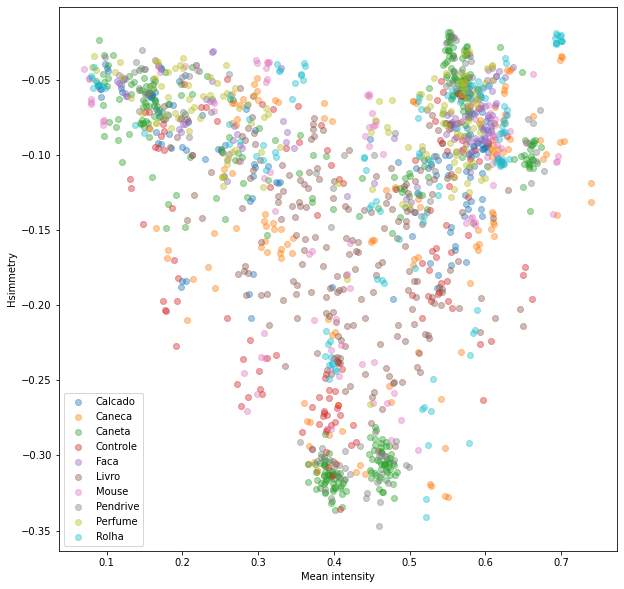

In [ ]:
os.chdir('/content/gdrive/My Drive/Trabalho_Visao')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
x, y, cls = load_random_imgs(1500, df)
plot_features(ax, x, y, cls)
plt.show()  

- Esse gráfico foi somente uma tentativa de vizualizar as diferenças, entre os objetos, utilizando somente duas informações extraidas da foto. Contudo, como pode ser verificado, por meio dessas *features* utilizadas, parece ser muito difícil haver alguma separação entre esses objetos. 

- Observação (Ainda não verificado):
  - Pode ser que as fotos com mais intensidades foram aquelas que foram tiradas no fundo preto, em contraste com as de fundo branco que provavelmente tiveram as menores intensidades;


